# Unsupervised Learning and Preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

## Preprocessing and scaling

Standard scaler: mean = 0, std = 1, no min/max

MinMax scaler: Exactly between 0 and 1 

Robust Scaler: Uses means and quartile, ignores outliers

Normalizer: Data points are projected on euclidean distance from center, used on directional data

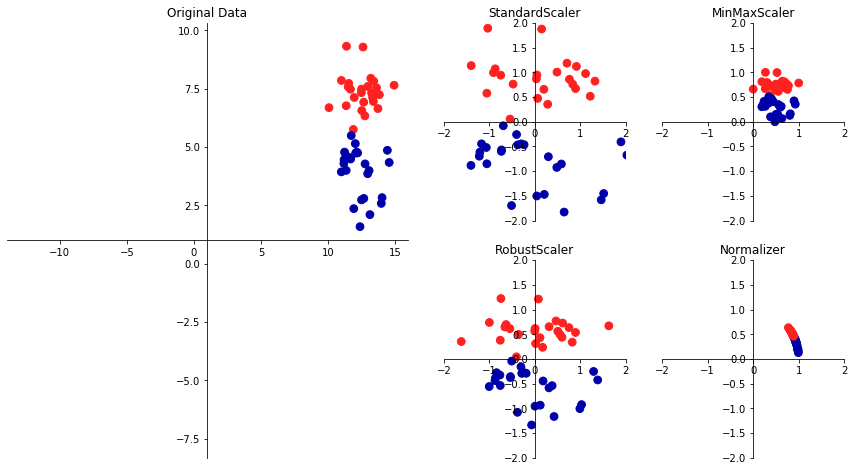

In [3]:
mglearn.plots.plot_scaling()

In [4]:
# Applying data transformations
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                    cancer.target, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
# Apply mixmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
# Transform Data
X_train_scaled = scaler.transform(X_train)
# Print dataset properties before and after transforming
print("Transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature max before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature min after scaling:\n{}".format(X_train_scaled.min(axis=0)))
print("per-feature max after scaling:\n{}".format(X_train_scaled.max(axis=0)))

Transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
per-feature max before scaling:
 [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
per-feature min after scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature max after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
# Transform test data with train data scaler
X_test_scaled = scaler.transform(X_test)
# Print test data properties after scaling 
print("per-feature test min after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature test max after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature test min after scaling:
[ 0.03540158  0.04190871  0.02895446  0.01497349  0.14260888  0.04999658
  0.          0.          0.07222222  0.00589722  0.00105015 -0.00057494
  0.00067851 -0.0007963   0.05148726  0.01434497  0.          0.
  0.04195752  0.01113138  0.03678406  0.01252665  0.03366702  0.01400904
  0.08531995  0.01833687  0.          0.          0.00749064  0.02367834]
per-feature test max after scaling:
[0.76809125 1.22697095 0.75813696 0.64750795 1.20310633 1.11643038
 0.99906279 0.90606362 0.93232323 0.94903117 0.45573058 0.72623944
 0.48593507 0.31641282 1.36082713 1.2784499  0.36313131 0.77476795
 1.32643996 0.72672498 0.82106012 0.87553305 0.77887345 0.67803775
 0.78603975 0.87843331 0.93450479 1.0024113  0.76384782 0.58743277]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

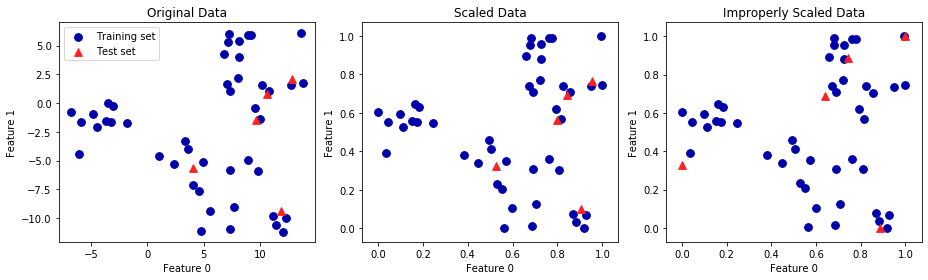

In [9]:
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

In [10]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scale fit and transform efficent way
X_scaled = scaler.fit_transform(X_train)

In [11]:
# Effect of preprocessing on supervised learning 
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


/Users/venuskuo/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
# preprocessing with min/max scaling 
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learning on SVM with scaled training data
svm.fit(X_train_scaled, y_train)

# Assessing accuracy
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


/Users/venuskuo/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
# Preprocessing with standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Calling fit and transform 
X_scaled = scaler.fit_transform(X_train)

In [14]:
from sklearn.svm import SVC 

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
svm = SVC(C=100)

# No preprocessing done
svm.fit(X_train, y_train)
print("No preprocessing")
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

No preprocessing
Test set accuracy: 0.63


/Users/venuskuo/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [15]:
# Preprocess using MinMax scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learning on SVM on scaled training data
svm.fit(X_train_scaled, y_train)

# Scoring
print("MinMax scaled")
print("Test Accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))
# Much better accuracy score

MinMax scaled
Test Accuracy: 0.97


/Users/venuskuo/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:
# Preprocessing using Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learn on SVM 
svm.fit(X_train_scaled, y_train)

# Scoring
print("StandardScaler Scaled")
print("Test Accuracy Score: {:.2f}".format(svm.score(X_test_scaled, y_test)))
# Not as good but still better than not preprocessing

StandardScaler Scaled
Test Accuracy Score: 0.96


# Dimensionality Reduction feature extraction

## Principal component Analysis 

A common method of decomposition or reducing dimensionality in a dataset that can be used for visualization or finding a more informative representation of the data. PCA is a method that rotates the data in such a way that the features are statistically uncorrelated (slope zero) and this usually includes dropping some unimportant but correlated features. 

First the algorithm finds features that are strongly correlated. Second, the algorithm finds direction that contains the most information while being orthagonal to each other and center the points to the mean. Third, to reduce dimensionality of the dataset less informative components are dropped leaving important components remaining.   

There are other similar algorithms like non-negative matrix factorization (NMF) and t-SNE which are commonly used for feature extraction and visualization respectively. 

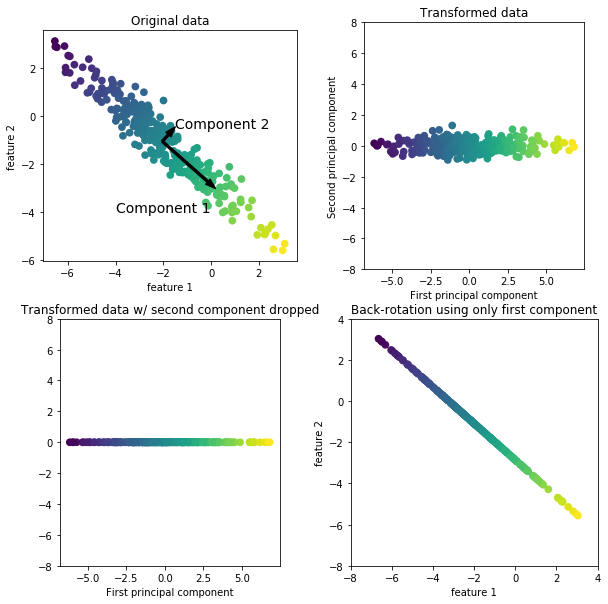

In [17]:
mglearn.plots.plot_pca_illustration()

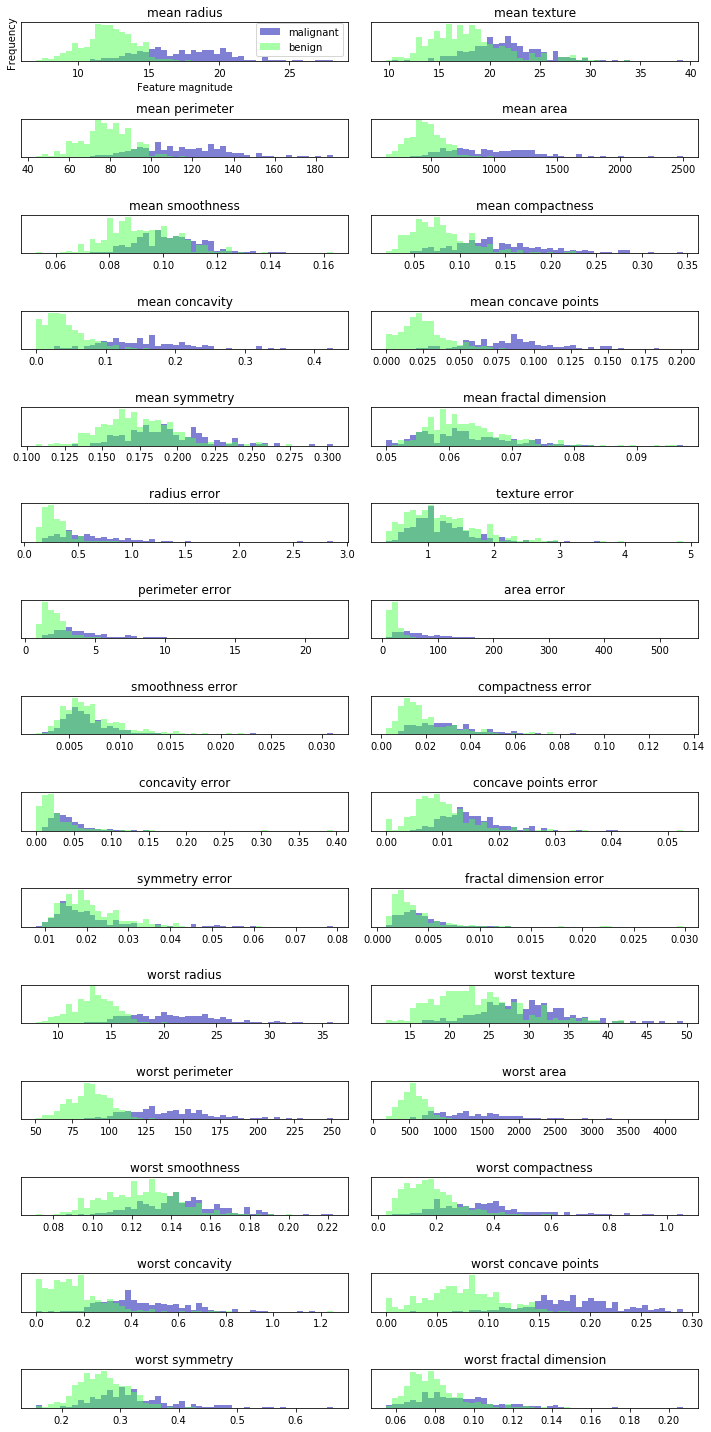

In [20]:
# Applying PCA to the cancer dataset for visualization with histogram
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()
# But often for highly-dimensional datasets it is not possible to visualize all feature distribution 
# or correlation scatter plots

In [24]:
# Scale Breast Cancer dataset and fit to PCA
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data) # Scale whole dataset

# Import PCA package 
from sklearn.decomposition import PCA
# Keep first two principal components of the data
pca = PCA(n_components = 2)
# fit PCA model to breast cancer dataset
pca.fit(X_scaled)

# transform data into the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# Indeed, pca did reduce data dimensionality to two components or features 

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

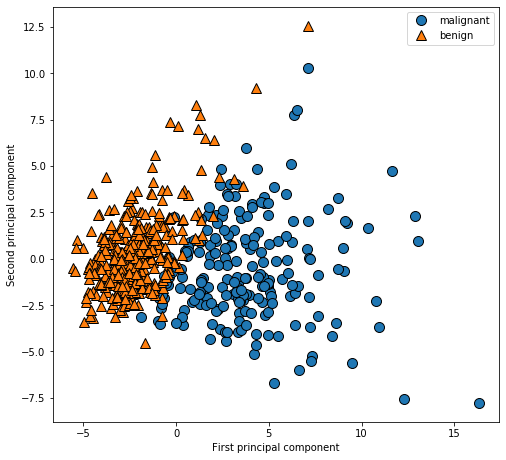

In [25]:
# plot components, colored by class
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
# No wonder why the linear SVM model performed really well (0.97).
# The data points seperate out very well. Hence, PCA can be an inital exploratory step. 

In [26]:
# Lookat the PCA component shape. 
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [27]:
# Look at PCA component for each feature 
print("PCA components: \n{}".format(pca.components_))

PCA components: 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal Components')

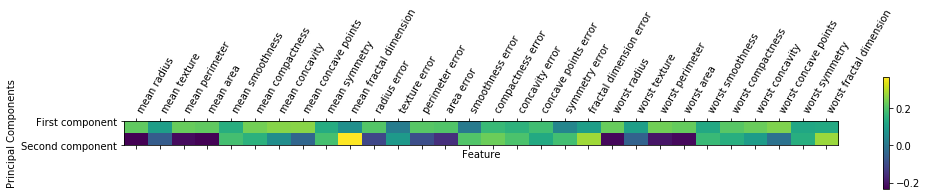

In [28]:
# Can't read the above component values so visualize with heat map
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal Components")
# Qualitative analysis. Very difficult to understand feature coeffient magnitude on dataset

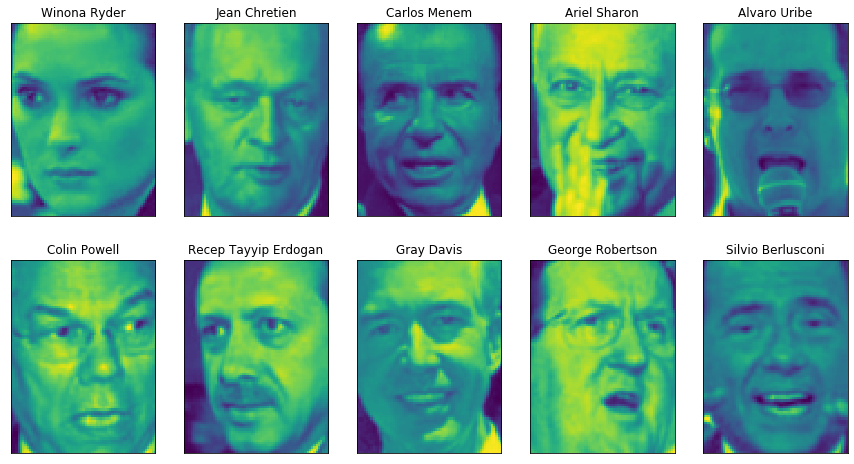

In [30]:
# Using Eigenfaces for feature extraction in PCA
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
# List some faces in image dataset

In [31]:
# Look at shape of image dataset
print("People.images shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))
# 62 people in dataset, many replicated, many features 

People.images shape: (3023, 87, 65)
Number of classes: 62


In [32]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()
# A few people have alot more pictures than others

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [33]:
# Equalize the number of pictures per label
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

In [39]:
# Use a k-Nearest Neighbor to fit data to 
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, 
                                                    random_state=0)
# Build classifier model with one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))
# Very low accuracy but good for a 62 way classifier

Test score of 1-nn: 0.23


### Transforming data with PCA for Supervised Machine Learning 

An accuracy of 23% is okay but not great. Using raw representation of grayscale pictures to compare pixel to pixel is not efficent or appropiate. We can improve image classification by using the whitening option of PCA, which rescales the prinicpal components of all images on the same scale. 

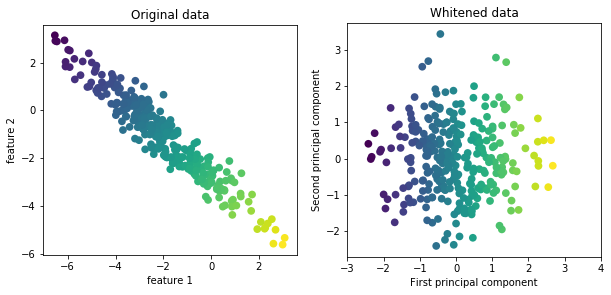

In [34]:
mglearn.plots.plot_pca_whitening()

In [40]:
# Fit the PCA model to the train set and extract the first 100 components
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))
# There are 1547 samples and 100 components. Don't know why we select 100 

X_train_pca.shape: (1547, 100)


In [42]:
# Feed the pca component into nearest neighbor classifer 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))
# The accuracy improved. Principal component is a better representation of the data

Test set accuracy: 0.31


In [43]:
# Visualize the first few components
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


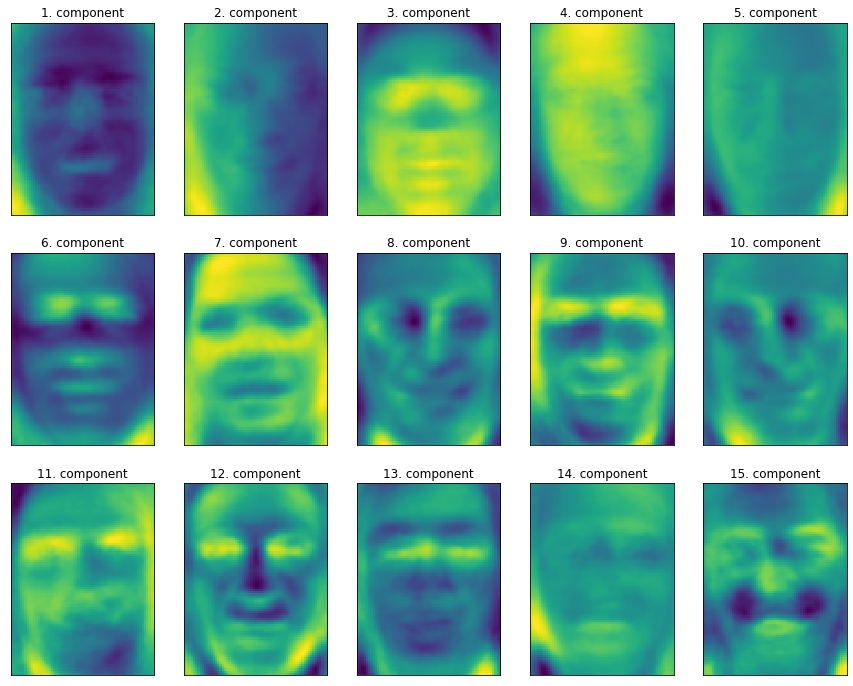

In [46]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))
    # The first few components seem to have a strong identifying feature that is primarily
    # driven by lighting, face composition, and face orientation. 

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
_______________________________________________________pca_faces - 15.0s, 0.3min


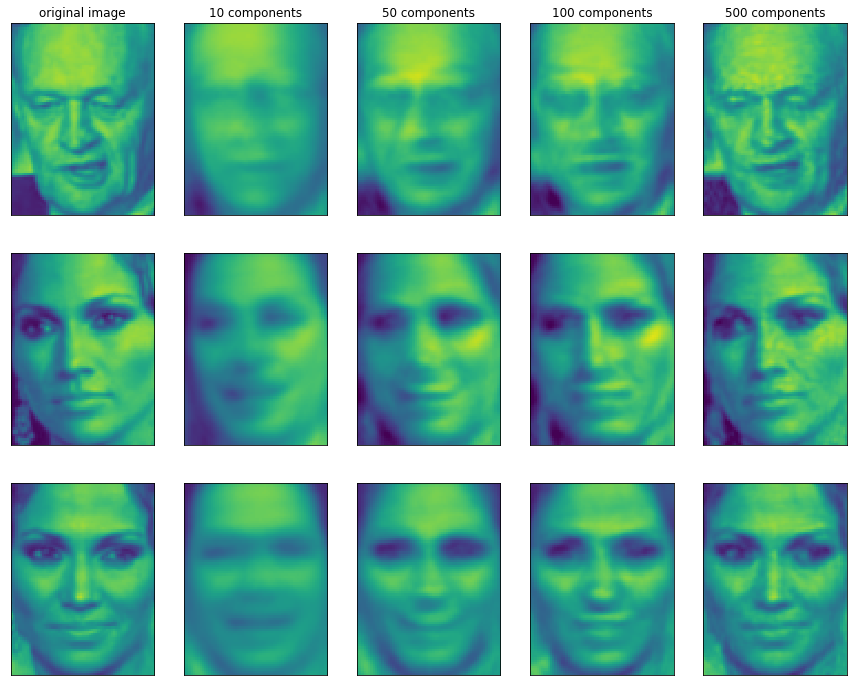

In [47]:
# Adding more components generally increases resolution of classification
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Second principal component')

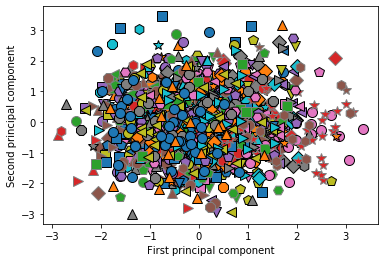

In [48]:
# Use PCA to visualize all the faces in the dataset in a scatterplot using first two 
# principal components
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

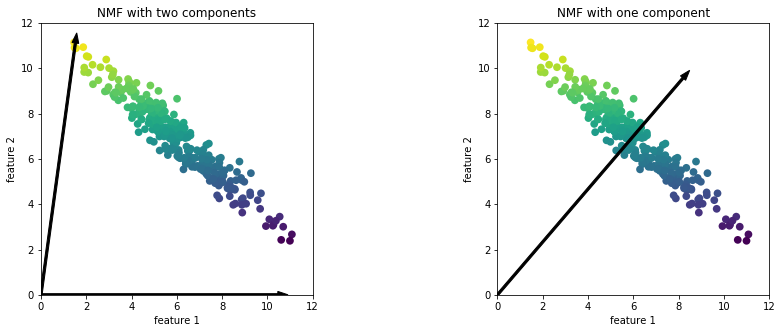

In [49]:
# Components found by NMF with two and one components 
mglearn.plots.plot_nmf_illustration()